In [1]:
from pycaret.classification import *
from pycaret.datasets import get_data
import pandas as pd

## Getting the dataset

In [2]:
#get dataset
dataset = get_data('bank')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#check the shape of data
dataset.shape

(45211, 17)

In [5]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
## sample returns a random sample from an axis of the object. That would be 38,429 samples, not 45211
data = dataset.sample(frac=0.85, random_state=456)

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8863,29,blue-collar,married,primary,no,25,yes,no,unknown,4,jun,188,2,-1,0,unknown,no
22688,40,technician,divorced,secondary,no,237,no,no,cellular,25,aug,87,5,-1,0,unknown,no
961,57,retired,married,tertiary,no,906,yes,no,unknown,7,may,117,1,-1,0,unknown,no
10229,45,services,married,primary,no,116,yes,no,unknown,11,jun,287,3,-1,0,unknown,no
21189,48,blue-collar,married,primary,no,-83,no,no,cellular,14,aug,136,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25728,58,blue-collar,divorced,primary,no,8218,yes,no,cellular,19,nov,141,2,111,10,failure,no
33430,28,student,single,secondary,no,0,no,no,cellular,20,apr,185,1,-1,0,unknown,yes
7481,44,blue-collar,single,primary,no,1593,yes,no,unknown,29,may,828,3,-1,0,unknown,yes
4593,40,services,married,primary,no,3559,yes,no,unknown,20,may,138,8,-1,0,unknown,no


In [8]:
# remove from the original dataset this random data
data_unseen = dataset.drop(data.index)
data_unseen

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
41,50,management,married,secondary,no,49,yes,no,unknown,5,may,180,2,-1,0,unknown,no
52,32,management,married,tertiary,no,0,yes,no,unknown,5,may,179,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,63,retired,married,secondary,no,1495,no,no,cellular,16,nov,138,1,22,5,success,no
45189,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [9]:
# Reseting the index of both datasets
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (38429, 17)
Unseen Data For Predictions: (6782, 17)


In [10]:
model_setup = setup(data=data, target='deposit', session_id=321)

,Description,Value
0,Session id,321
1,Target,deposit
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(38429, 17)"
5,Transformed data shape,"(38429, 49)"
6,Transformed train set shape,"(26900, 49)"
7,Transformed test set shape,"(11529, 49)"
8,Ordinal features,3
9,Numeric features,7


## Compare Model

In [11]:
#Compare Model

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9091,0.9364,0.4839,0.6495,0.5541,0.5047,0.5118,1.4950
lightgbm,Light Gradient Boosting Machine,0.9081,0.9347,0.4814,0.6432,0.5499,0.5000,0.5069,1.4960
xgboost,Extreme Gradient Boosting,0.9072,0.9309,0.4884,0.6344,0.5513,0.5005,0.5062,1.2350
gbc,Gradient Boosting Classifier,0.9056,0.9262,0.4054,0.6556,0.5003,0.4514,0.4677,1.4290
rf,Random Forest Classifier,0.9039,0.9267,0.3653,0.6622,0.4703,0.4223,0.4453,1.5270
lr,Logistic Regression,0.9015,0.9038,0.3475,0.6459,0.4510,0.4023,0.4261,2.5670
lda,Linear Discriminant Analysis,0.9002,0.9078,0.4432,0.5987,0.5089,0.4548,0.4614,1.2640
ridge,Ridge Classifier,0.9000,0.0000,0.2838,0.6716,0.3982,0.3534,0.3931,1.4140
ada,Ada Boost Classifier,0.8997,0.9093,0.3799,0.6143,0.4686,0.4168,0.4319,1.3580
et,Extra Trees Classifier,0.8984,0.9050,0.3248,0.6292,0.4279,0.3783,0.4036,1.6490


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [12]:
print(best_model)

## Create the Model

In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [14]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9164,0.9336,0.4841,0.7070,0.5747,0.5301,0.5418
1,0.9078,0.9276,0.3854,0.6875,0.4939,0.4476,0.4703
2,0.9004,0.9253,0.3662,0.6250,0.4618,0.4110,0.4289
3,0.9063,0.9207,0.4236,0.6520,0.5135,0.4643,0.4775
4,0.9078,0.9369,0.4108,0.6719,0.5099,0.4622,0.4793
5,0.9059,0.9268,0.4076,0.6564,0.5029,0.4541,0.4699
6,0.9011,0.9309,0.4236,0.6101,0.5000,0.4471,0.4563
7,0.9048,0.9221,0.3714,0.6686,0.4776,0.4299,0.4524
8,0.9011,0.9140,0.3651,0.6354,0.4637,0.4136,0.4329


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
#trained model object is stored in the variable 'gbc'. 
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=321, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Tunning the Model

In [17]:
# Accuracy in previous model is 0.9056 and in the tuned model accuracy is 0.9065

tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9104,0.9373,0.4841,0.6580,0.5578,0.5092,0.5167
1,0.9082,0.9295,0.4299,0.6650,0.5222,0.4740,0.4879
2,0.9045,0.9278,0.4841,0.6154,0.5419,0.4894,0.4938
3,0.9097,0.9253,0.5159,0.6403,0.5714,0.5216,0.5254
4,0.9100,0.9418,0.4713,0.6607,0.5502,0.5018,0.5106
5,0.9041,0.9241,0.4682,0.6176,0.5326,0.4803,0.4860
6,0.9059,0.9326,0.4904,0.6235,0.5490,0.4974,0.5018
7,0.9037,0.9288,0.4603,0.6197,0.5282,0.4759,0.4824
8,0.9011,0.9207,0.4540,0.6034,0.5181,0.4642,0.4701


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='log_loss', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.01, min_samples_leaf=3,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=80, n_iter_no_change=None,
                           random_state=321, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Plotting the Model

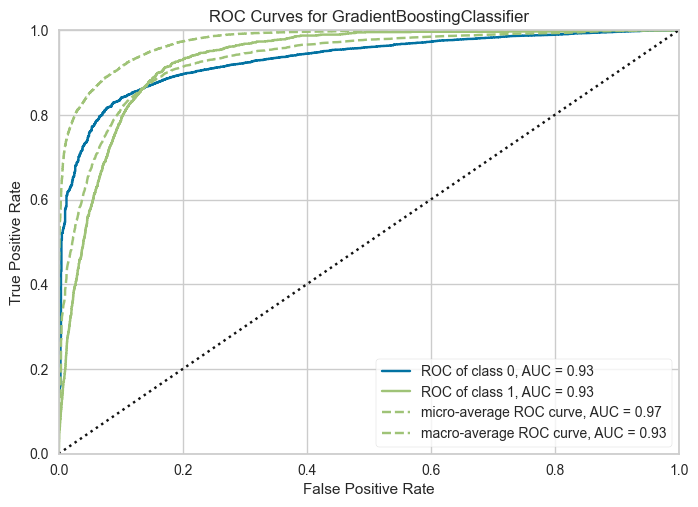

In [19]:
## AUC Plot

plot_model(tuned_gbc, plot = 'auc')


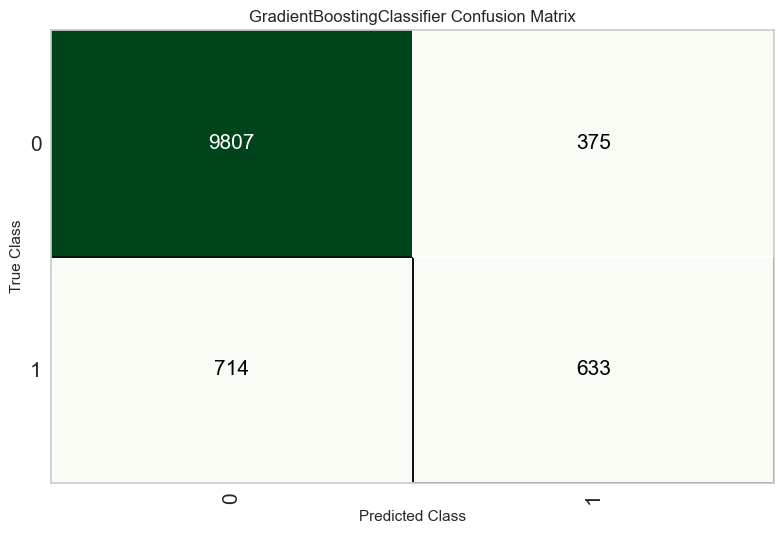

In [20]:
## Consufion matrix

plot_model(tuned_gbc, plot = 'confusion_matrix')

## Evaluation the model


In [21]:
## model performance is to use the evaluate_model()
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalizing the Model

In [22]:
final_gbc = finalize_model(tuned_gbc)
final_gbc

Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indica...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='log_loss',
                                            max_depth=5, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.01,
                                            min_samples_leaf=3,
                                            min_samples_split=4,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=80,
                                            n_iter_no_change=None,
                                            random_state=321, subsample=0.95,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

In [23]:
#Final gbc parameters for deployment
print(final_gbc)

Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day',
                                             'duration', 'campaign', 'pdays',
                                             'previous'],
                                    transformer=SimpleImputer(add_indica...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='log_loss',
                                            max_depth=5, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_dec

## Predicting with the model

In [24]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9300,0.9563,0,0,0,0.6217,0.6289


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,prediction_label,prediction_score
6528,42,management,married,tertiary,no,144,no,no,cellular,4,mar,148,1,87,4,failure,yes,no,0.5555
34032,51,unemployed,married,secondary,no,636,no,no,cellular,30,jan,321,1,-1,0,unknown,no,no,0.9481
30754,36,blue-collar,single,secondary,no,2235,yes,no,cellular,20,nov,287,2,-1,0,unknown,no,no,0.9765
34456,48,services,married,secondary,no,116,yes,no,telephone,20,apr,70,4,-1,0,unknown,no,no,0.9978
13459,30,unknown,single,tertiary,no,6836,no,no,cellular,27,feb,30,3,-1,0,unknown,no,no,0.7563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5728,56,services,married,secondary,no,83,no,no,cellular,27,aug,26,11,-1,0,unknown,no,no,0.9970
25520,42,blue-collar,divorced,unknown,no,0,no,no,cellular,7,jul,64,2,-1,0,unknown,no,no,0.9964
26232,31,services,married,secondary,no,428,yes,no,unknown,21,may,272,1,-1,0,unknown,no,no,0.9913
19434,30,blue-collar,married,secondary,no,664,no,yes,telephone,14,may,57,1,-1,0,unknown,no,no,0.9900


In [25]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9068,0.9340,0,0,0,0.5002,0.5059


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,prediction_label,prediction_score
0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no,0.9993
1,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no,0.9978
2,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no,no,0.9979
3,50,management,married,secondary,no,49,yes,no,unknown,5,may,180,2,-1,0,unknown,no,no,0.9967
4,32,management,married,tertiary,no,0,yes,no,unknown,5,may,179,1,-1,0,unknown,no,no,0.9967


## Save Model 

In [26]:
save_model(final_gbc, './Pycaret/Final_gbc')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day',
                                              'duration', 'campaign', 'pdays',
                                              'previous'],
                                     transformer=SimpleImputer(add_indica...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.3, loss='log_loss',
                                             max_depth=5, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             m

## Load Model

In [27]:
saved_final_gbc = load_model('./Pycaret/Final_gbc')

Transformation Pipeline and Model Successfully Loaded


In [28]:
new_prediction = predict_model(saved_final_gbc, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9068,0.9340,0,0,0,0.5002,0.5059


In [29]:
new_prediction.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,prediction_label,prediction_score
0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no,0.9993
1,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no,0.9978
2,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no,no,0.9979
3,50,management,married,secondary,no,49,yes,no,unknown,5,may,180,2,-1,0,unknown,no,no,0.9967
4,32,management,married,tertiary,no,0,yes,no,unknown,5,may,179,1,-1,0,unknown,no,no,0.9967
